In [2]:
# Can do feature engineering!

import numpy as np
import matplotlib.pyplot as plt

In [3]:
def import_csv_data(filename: str):
    with open(filename, "r") as file:
        contents = file.readlines()

    data = np.array([line.removesuffix("\n").split(",") for line in contents[1:]])
    classifiers = list(np.unique(data[:, -1]))
    data = np.c_[[list(map(float, line)) for line in data[:, :-1]], [classifiers.index(category) for category in data[:, -1]]]
    return data

In [85]:
data_file = "Raisin_Dataset.csv"
batch_data = import_csv_data(data_file)

training_num = 750
data_indices = np.random.choice(batch_data.shape[0], size = (training_num, ), replace = False)
testing_indices = np.setdiff1d(np.arange(batch_data.shape[0]), data_indices)

data = batch_data[data_indices]
testing = batch_data[testing_indices]

print(data)
print(testing)

[[7.49660000e+04 4.65360816e+02 2.09279646e+02 ... 7.12414947e-01
  1.15708900e+03 0.00000000e+00]
 [6.16000000e+04 3.50182754e+02 2.25842771e+02 ... 7.46829611e-01
  9.72472000e+02 1.00000000e+00]
 [1.24630000e+05 5.85093803e+02 2.75493613e+02 ... 6.81831859e-01
  1.48599000e+03 0.00000000e+00]
 ...
 [5.11800000e+04 2.88631065e+02 2.26630491e+02 ... 7.37442725e-01
  8.55997000e+02 1.00000000e+00]
 [2.02118000e+05 6.84602958e+02 3.79719282e+02 ... 7.17218816e-01
  1.82790000e+03 0.00000000e+00]
 [1.93818000e+05 6.78559565e+02 3.67900362e+02 ... 7.91546190e-01
  1.76687300e+03 0.00000000e+00]]
[[4.24920000e+04 3.10146072e+02 1.76131449e+02 ... 6.65893562e-01
  8.23796000e+02 1.00000000e+00]
 [7.41670000e+04 3.87798931e+02 2.47858123e+02 ... 6.80181585e-01
  1.08472900e+03 1.00000000e+00]
 [4.32950000e+04 3.04284467e+02 1.82811037e+02 ... 7.13838189e-01
  8.14680000e+02 1.00000000e+00]
 ...
 [1.26019000e+05 5.20680034e+02 3.16189875e+02 ... 6.94510885e-01
  1.42224200e+03 0.00000000e+00]

In [5]:
X_train = data[:, :-1]
y_train = data[:, -1]

features = ["Area", "Major Axis Length", "Minor Axis Length", "Eccentricity", "Convex Area", "Extent", "Perimeter", "Class"]

highlight = "\033[0;32;40m"
highlight_2 = "\033[0;33;48m"
normal = "\033[0;37;48m"

print(X_train)
print(y_train)

[[8.75240000e+04 4.42246011e+02 2.53291155e+02 ... 9.05460000e+04
  7.58650579e-01 1.18404000e+03]
 [7.51660000e+04 4.06690687e+02 2.43032436e+02 ... 7.87890000e+04
  6.84129570e-01 1.12178600e+03]
 [9.08560000e+04 4.42267048e+02 2.66328318e+02 ... 9.37170000e+04
  6.37612812e-01 1.20857500e+03]
 ...
 [1.68269000e+05 6.14380432e+02 3.53466300e+02 ... 1.73527000e+05
  7.56241377e-01 1.64145600e+03]
 [9.93330000e+04 4.22876940e+02 3.02209573e+02 ... 1.01942000e+05
  7.20765368e-01 1.19134800e+03]
 [1.02722000e+05 4.16898937e+02 3.17542803e+02 ... 1.07169000e+05
  7.24419777e-01 1.26198800e+03]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [11]:
def z_score_normalization(X_matrix):
    features_mean = np.mean(X_matrix, axis = 0)
    features_std_dev = np.std(X_matrix, axis = 0)

    normalized_X_matrix = (X_matrix - features_mean) / features_std_dev
    return normalized_X_matrix

In [7]:
def calculate_cost(X_matrix, y_set, W_set, b, reg_param):
    m = X_matrix.shape[0]

    predictions = 1 / (1 + np.exp(-(X_matrix @ W_set + b)))
    losses = y_set * -np.log(predictions) + (1 - y_set) * -np.log(1 - predictions)

    fitting_data_cost = np.sum(losses) / m
    regularization_cost = reg_param * np.sum(W_set ** 2) / (2 * m)

    return fitting_data_cost + regularization_cost

In [8]:
def calculate_gradient(X_matrix, y_set, W_set, b, reg_param):
    m = X_matrix.shape[0]

    predictions = 1 / (1 + np.exp(-(X_matrix @ W_set + b)))
    errors = predictions - y_set

    dj_dW = (X_matrix.T @ errors + reg_param * W_set) / m
    dj_db = np.sum(errors) / m

    return dj_dW, dj_db

In [10]:
def gradient_descent(X_matrix, y_set, W_set, b, alpha, reg_param, num_iters, display_logs = True):
    iteration_history = [0]
    cost_history = [calculate_cost(X_matrix, y_set, W_set, b, reg_param)]

    for iteration in range(num_iters):
        dj_dW, dj_db = calculate_gradient(X_matrix, y_set, W_set, b, reg_param)

        W_set = W_set - alpha * dj_dW
        b = b - alpha * dj_db

        if (iteration + 1) % (num_iters // 100) == 0:
            iteration_history.append(iteration + 1)
            cost_history.append(calculate_cost(X_matrix, y_set, W_set, b, reg_param))
            if display_logs:
                print(f"{highlight_2}{iteration_history[-1]}{normal} {W_set} {b} {dj_dW} {dj_db} {highlight}{cost_history[-1]}{normal}")

    return W_set, b, iteration_history, cost_history

In [17]:
def alpha_learning_curve(X_matrix, y_set, initial_W_set, initial_b, alpha, reg_param, num_iters):
    subplot = plt.subplot(1, 1, 1)

    plot_iterations = 0
    prev_alpha = alpha

    W_set_history, b_history, min_cost_history, alpha_history = [], [], [], []
    while True:
        if plot_iterations != 0:
            if plot_iterations % 2 == 0:
                alpha = prev_alpha * 10
                prev_alpha = alpha
            else:
                alpha = prev_alpha * 3
                
        W_set, b, iter_history, cost_history = gradient_descent(X_matrix, y_set, initial_W_set, initial_b, alpha, reg_param, num_iters, False)

        if np.isnan(np.sum(W_set)) or np.isnan(b) or np.isnan(np.sum(cost_history[-1])):
            break

        print(f"Iteration {plot_iterations + 1}   Alpha: {alpha}, Minimum Cost Reached: {cost_history[-1]}")

        W_set_history.append(W_set)
        b_history.append(b)
        min_cost_history.append(cost_history[-1])
        alpha_history.append(alpha)

        subplot.plot(iter_history, cost_history, label = f"LR: {alpha:0.1e}")
        plot_iterations += 1

    plt.legend()
    plt.show()
    return W_set_history, b_history, min_cost_history, alpha_history, plot_iterations

In [91]:
def lambda_learning_curve(X_matrix, y_set, initial_W_set, initial_b, alpha, reg_param, num_iters, lambda_iters):
    subplot = plt.subplot(1, 1, 1)

    prev_reg_param = reg_param
    W_set_history, b_history, results_history, reg_param_history = [], [], [], []

    X_testing = z_score_normalization(testing[:, :-1])
    y_testing = testing[:, -1]

    for plot_iterations in range(lambda_iters):
        W_set, b, iter_history, cost_history = gradient_descent(X_matrix, y_set, initial_W_set, initial_b, alpha, reg_param, num_iters, False)
        if np.isnan(np.sum(W_set)) or np.isnan(b) or np.isnan(np.sum(cost_history[-1])):
            break

        predictions = list(map(lambda x: 1 if x >= 0.5 else 0, 1 / (1 + np.exp(-(X_testing @ W_set + b)))))
        results = predictions == y_testing

        print(f"Iteration {plot_iterations + 1}   Lambda: {reg_param}, Accuracy: {np.mean(results)}, W_set: {W_set}")

        W_set_history.append(W_set)
        b_history.append(b)
        results_history.append(np.mean(results))
        reg_param_history.append(reg_param)

        reg_param += 5e-1

    subplot.plot(reg_param_history, results_history, label = f"Lambda: {np.max(reg_param_history):0.1e}")

    plt.legend()
    plt.show()
    
    return W_set_history, b_history, results_history, reg_param_history

In [104]:
norm_X_train = z_score_normalization(X_train)

initial_W_set = np.zeros(norm_X_train.shape[1])
initial_b = 0
learning_rate = 1
regularization_parameter = 100
num_iters = 10000

Iteration 1   Alpha: 1, Minimum Cost Reached: 0.638114726355046


C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_4612\66640186.py:4: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-(X_matrix @ W_set + b)))
C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_4612\3612574890.py:5: RuntimeWarning: divide by zero encountered in log
  losses = y_set * -np.log(predictions) + (1 - y_set) * -np.log(1 - predictions)
C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_4612\3612574890.py:5: RuntimeWarning: invalid value encountered in multiply
  losses = y_set * -np.log(predictions) + (1 - y_set) * -np.log(1 - predictions)
C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_4612\3612574890.py:8: RuntimeWarning: overflow encountered in square
  regularization_cost = reg_param * np.sum(W_set ** 2) / (2 * m)
C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_4612\66640186.py:7: RuntimeWarning: overflow encountered in multiply
  dj_dW = (X_matrix.T @ errors + reg_param * W_set) / m
C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_4612\66640186.p

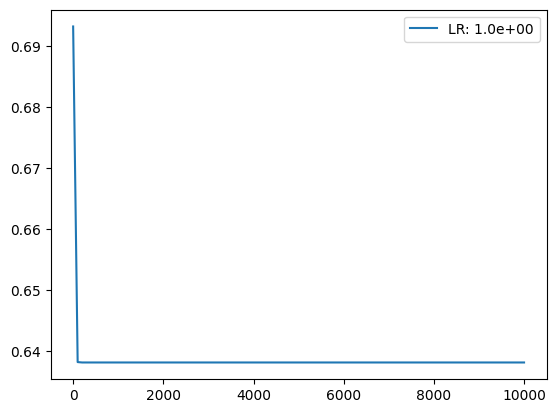

([array([-0.0276639 , -0.04449451, -0.00788461, -0.06021296, -0.02788735,
          0.02997618, -0.04074688])],
 [0.0872634886957585],
 [0.638114726355046],
 [1],
 1)

In [39]:
alpha_learning_curve(norm_X_train, y_train, initial_W_set, initial_b, learning_rate, regularization_parameter, num_iters)

Iteration 1   Lambda: 100.0, Accuracy: 0.8733333333333333, W_set: [-0.34434714 -0.42352998 -0.22932426 -0.37056347 -0.34468807  0.13582737
 -0.42653565]
Iteration 2   Lambda: 100.5, Accuracy: 0.8733333333333333, W_set: [-0.34389968 -0.42287924 -0.2291484  -0.36989077 -0.344231    0.13562594
 -0.42580909]
Iteration 3   Lambda: 101.0, Accuracy: 0.8733333333333333, W_set: [-0.34345408 -0.4222316  -0.22897262 -0.36922136 -0.34377588  0.13542516
 -0.42508663]
Iteration 4   Lambda: 101.5, Accuracy: 0.8733333333333333, W_set: [-0.34301033 -0.42158701 -0.2287969  -0.36855521 -0.3433227   0.13522503
 -0.42436821]
Iteration 5   Lambda: 102.0, Accuracy: 0.8733333333333333, W_set: [-0.34256842 -0.42094547 -0.22862127 -0.36789229 -0.34287145  0.13502555
 -0.42365379]
Iteration 6   Lambda: 102.5, Accuracy: 0.8733333333333333, W_set: [-0.34212833 -0.42030694 -0.22844572 -0.36723258 -0.34242211  0.13482671
 -0.42294334]
Iteration 7   Lambda: 103.0, Accuracy: 0.8733333333333333, W_set: [-0.34169006 -0.

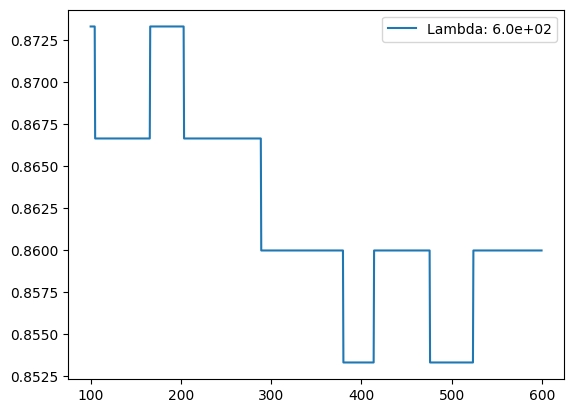

In [95]:
lambda_iters = 1000
W_set_history, b_history, accuracy_history, reg_param_history = lambda_learning_curve(norm_X_train, y_train, initial_W_set, initial_b, learning_rate, regularization_parameter, num_iters, lambda_iters)

In [103]:
max_accuracy = np.max(accuracy_history)
print(f"Best Lambda: {reg_param_history[np.where(accuracy_history == max_accuracy)[0][0]]} with Accuracy: {max_accuracy}")

Best Lambda: 100.0 with Accuracy: 0.8733333333333333


In [97]:
final_W_set, final_b, iter_history, cost_history = gradient_descent(norm_X_train, y_train, initial_W_set, initial_b, learning_rate, regularization_parameter, num_iters)

100 [-0.27989407 -0.33319746 -0.19844304 -0.27871268 -0.2792769   0.10549957
 -0.33027919] 0.042878565857211115 [-4.48954338e-12 -2.55178467e-12  2.29979277e-12  3.38593676e-12
 -5.05609672e-12  4.07630008e-13 -1.53452153e-12] -4.503234282203587e-11 0.46840712087019065
200 [-0.27989407 -0.33319746 -0.19844304 -0.27871268 -0.2792769   0.10549957
 -0.33027919] 0.04287856607718772 [ 8.35932630e-18  0.00000000e+00  0.00000000e+00  8.35932630e-18
  0.00000000e+00  0.00000000e+00 -1.67186526e-17] 0.0 0.46840712087019054
300 [-0.27989407 -0.33319746 -0.19844304 -0.27871268 -0.2792769   0.10549957
 -0.33027919] 0.04287856607718772 [ 8.35932630e-18  0.00000000e+00  0.00000000e+00  8.35932630e-18
  0.00000000e+00  0.00000000e+00 -1.67186526e-17] 0.0 0.46840712087019054
400 [-0.27989407 -0.33319746 -0.19844304 -0.27871268 -0.2792769   0.10549957
 -0.33027919] 0.04287856607718772 [ 8.35932630e-18  0.00000000e+00  0.00000000e+00  8.35932630e-18
  0.00000000e+00  0.00000000e+00 -1.67186526e-17] 0.0 

In [98]:
X_testing = z_score_normalization(testing[:, :-1])
y_testing = testing[:, -1]

predictions = list(map(lambda x: 1 if x >= 0.5 else 0, 1 / (1 + np.exp(-(X_testing @ final_W_set + final_b)))))

results = predictions == y_testing
print(f"Accuracy: {np.mean(results)}")
print(predictions)

Accuracy: 0.8733333333333333
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]


In [99]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(norm_X_train, y_train)
print(f"Accuracy: {lr_model.score(z_score_normalization(X_testing), y_testing)}")

Accuracy: 0.8666666666666667
